<img src='img/NYCDSA_Corporate_Logo_Horizontal.png' width="450" align='center'>

# Data Manipulation and Visualization with pandas

## Introduction

Thank you for joining this **NYC Data Science Academy** info session! Today we will be exploring some of the tools that are made available to us through the **pandas** library. Pandas is a fast, powerful, flexible, and easy to use open source data analysis and manipulation tool built on top of the Python programming language.

We will be covering some of the basic tools we use to explore, analyze, and visualize datasets. The topics we cover today will be a brief glimpse into the material that is taught in our [**Residential Bootcamp**](https://nycdatascience.com/data-science-bootcamp/), [**Online Bootcamp**](https://nycdatascience.com/online-data-science-bootcamp/) and [**Professional Development**](https://nycdatascience.com/course-bundles/) programs.

The main dataset we will be exploring today is the **2018 Natality data** which was provided by the Centers for Disease Control and Prevention. The data is very rich, meaning that each birth reported in 2018 within the USA ends up as a row, and there are on the order of 100 columns, containing information (including such things as age, race, education level, use of cigarettes, presence of certain STDs) for the mother, potentially the father, as well as several features of the infant post-birth; if available, the varying metrics span the entire pregnancy and shortly afterwards. The full size of this dataset is around 3.8+ million rows, so for the sake of making this data easy to distribute we will be looking at a random sample of 1% of the total data which gives us around 38,000 rows.

Included in the folder is a PDF file named "UserGuide2018-508.pdf" which can be used as a data dictionary. The data was transformed from a different format so the column names might differ from what is in the PDF and there are some columns missing from the original data. However, you can use the PDF to understand the data better by inspecting the Field, Description, Values, and Definition columns to understand how the values in the dataset translate.

### Topics we will cover today:
- <a href="#pandas">Getting Started with Pandas</a>
- <a href="#inputoutput">Reading and Saving DataFrames</a>
- <a href="#manipulation">Inspecting and Manipulating DataFrames</a>
- <a href="#grouping">Grouping and Aggregation</a>
- <a href="#visualization">Data Visualization</a>

<a name="pandas"></a>

# Getting Started with Pandas

We will first need to import the pandas library so we can access the different classes and functions that are available within it.

One of the best features of open source programming languages is the ability to use the contributions of other coders so you don't need to "reinvent the wheel." Most of the time, these existing classes and functions are optimized to run efficiently, so it's a good idea to use them instead of implementing your own from scratch (unless you are doing this to get a better understanding of how these tools were created!).

Below is a standard import statement that will allow you to use things like packages and modules that contain prewritten code which may include objects like classes, functions, and constants. 

In [3]:
import numpy

sqrt_sixteen = numpy.sqrt(16)

print(f'This is the square root of the number 16: {sqrt_sixteen}')
print(f'This is the value of pi to 15 decimal places: {numpy.pi}')

This is the square root of the number 16: 4.0
This is the value of pi to 15 decimal places: 3.141592653589793


**Note:** Adding an `f` before a string enables string formatting. This allows us to insert a value for more dynamic strings. Add a value or a variable between the curly braces to have it displayed inside the printed string.

After importing the NumPy library above, we can reference the things inside by calling `numpy.thing_we_want_to_use`. Above we show the `numpy.sqrt()` function and the constant `numpy.pi`.

Sometimes, especially when using popular modules and packages, it is preferable to use an **alias** when importing. This will allow us to reference that resource by using a different (usually shorter) name.

In [5]:
import numpy as np

print(f"I'm using NumPy with an alias to print out pi! {np.pi}")

I'm using NumPy with an alias to print out pi! 3.141592653589793


After importing the NumPy library using the alias `np`, we can now call objects from within NumPy by using the name `np` instead of the full name `numpy`. Using this specific alias is a widely accepted convention in the Python community and should be followed.

Now let's import pandas with an alias.

In [6]:
import pandas as pd

pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 20.6.0
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.1.3.post20200325
Cython           : 0.29.24
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 1.2.8
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       : None
matplotlib       : 3.1.2
nu

Again, the alias `pd` for `pandas` is a standard convention in the programming community. Please follow this convention!

Now that we've imported the pandas library using an alias, we're ready to get started!

<a name="inputoutput"></a>

# Reading and Saving DataFrames

In order to start working with the data, we will first need to load it into our workspace. There are many different ways to read data into our environment using pandas. Since we are working with a Comma Separated Value (CSV) file, we will use the function to read this type of data into a DataFrame.

In [9]:
df = pd.read_csv('data/2018Natality_sampled.csv')

**Note:** The only argument we use in this function call is the filepath. There are many other arguments that are available to pass such as indicating whether there is a header row (`header`) or which column to use as the index (`index_col`). For now, the filepath is the the only argument we need to pass. Our data is located in the data folder inside our present working directory. To read data from other places in your local file system, you must include the absolute filepath (the entire path to the file) or you must move the data inside your present working directory.

We can print out the DataFrame by typing the name we gave it into a cell in the notebook and then running the cell.

In [10]:
df

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y
1,2018,4,240,3,1,,17,1,3,1,...,N,N,N,N,N,N,1,N,Y,N
2,2018,9,724,3,1,,23,1,2,6,...,N,N,N,N,N,N,1,N,Y,N
3,2018,6,1301,5,1,,27,1,2,1,...,N,N,N,N,N,N,1,N,Y,U
4,2018,1,2235,3,1,,26,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,6,2359,1,1,,30,1,1,1,...,N,N,N,N,N,N,1,N,Y,N
38011,2018,4,1429,3,1,,31,1,1,1,...,N,N,N,N,N,N,1,N,Y,U
38012,2018,1,955,6,1,,30,2,1,4,...,N,N,N,N,N,N,1,N,Y,Y
38013,2018,10,1442,3,1,,50,2,1,1,...,N,N,N,N,N,N,1,N,Y,Y


Notice that, because this DataFrame is large, the rows and columns are truncated. To increase the number of visible rows and columns we can change some pandas options, but we won't cover that today.

Next, let's take a subset of the rows and columns in the full DataFrame so we can save it as a new CSV file.

In [11]:
column_subset = ['birth_year', 'birth_month', 'birth_time', 'birth_day_of_wk']
df_subset = df[column_subset].sample(2000)

df_subset

,birth_year,birth_month,birth_time,birth_day_of_wk
27004,2018,6,2120,6
25791,2018,3,1420,7
26569,2018,7,1040,5
1274,2018,4,2118,7
19686,2018,10,1407,4
...,...,...,...,...
462,2018,6,2327,7
18303,2018,7,2205,2
28189,2018,7,847,2
36653,2018,7,1806,7


Now that we have this new DataFrame, we can save it to a CSV file using the `to_csv()` method. Note that this needs to be called by a DataFrame object or it won't work!

In [12]:
df_subset.to_csv('data/df_write_test.csv')

After running the above cell, you should see a file called `df_write_test.csv` inside the data folder within our present working directory. Let's read it back into our workspace using another argument that we referred to earlier.

In [16]:
df2 = pd.read_csv('data/df_write_test.csv', header=None)
df2

,0,1,2,3,4
0,NaN,birth_year,birth_month,birth_time,birth_day_of_wk
1,27004.0,2018,6,2120,6
2,25791.0,2018,3,1420,7
3,26569.0,2018,7,1040,5
4,1274.0,2018,4,2118,7
...,...,...,...,...,...
1996,462.0,2018,6,2327,7
1997,18303.0,2018,7,2205,2
1998,28189.0,2018,7,847,2
1999,36653.0,2018,7,1806,7


Notice that when we set `header` to `None`, our header row becomes the first row in our DataFrame. This is definitely **not** something we want to do because it is not an observation in our dataset. Make sure you load your data correctly or you may end up with mistakes like this!

<a name="manipulation"></a>

# Inspecting and Manipulating DataFrames

### Inspecting

After loading a DataFrame into your workspace, it's a good idea to inspect the data first to see what kind of values you're working with. We can do this by using the `head()` or `tail()` method, or by taking a random sample of the data by using the `sample()` method like we did before.

- `head()`: Displays the first 5 rows of the DataFrame
- `tail()`: Displays the last 5 rows of the DataFrame
- `sample(n, replace=False)`: Displays n random rows without replacement. To allow rows to be sampled more than once, change the value of the `replace` argument to `True`. You can replace the argument `n` with `frac` to pass a value between 0 and 1 to indicate what fraction of the data you'd like to sample.

In [17]:
df.head()

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y
1,2018,4,240,3,1,,17,1,3,1,...,N,N,N,N,N,N,1,N,Y,N
2,2018,9,724,3,1,,23,1,2,6,...,N,N,N,N,N,N,1,N,Y,N
3,2018,6,1301,5,1,,27,1,2,1,...,N,N,N,N,N,N,1,N,Y,U
4,2018,1,2235,3,1,,26,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y


In [10]:
df.tail()

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
38010,2018,6,2359,1,1,,30,1,1,1,...,N,N,N,N,N,N,1,N,Y,N
38011,2018,4,1429,3,1,,31,1,1,1,...,N,N,N,N,N,N,1,N,Y,U
38012,2018,1,955,6,1,,30,2,1,4,...,N,N,N,N,N,N,1,N,Y,Y
38013,2018,10,1442,3,1,,50,2,1,1,...,N,N,N,N,N,N,1,N,Y,Y
38014,2018,6,155,7,4,,32,1,2,2,...,N,N,N,N,N,N,1,N,Y,N


In [11]:
df.sample(1000)

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
33555,2018,10,835,3,1,,23,1,1,1,...,N,N,N,N,N,N,1,Y,Y,N
8217,2018,12,1456,1,1,,17,1,1,1,...,N,N,N,N,N,N,1,N,Y,U
37646,2018,12,235,2,1,,22,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
26790,2018,9,2017,2,1,,24,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y
27345,2018,6,1237,7,1,,28,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17736,2018,12,211,3,1,,31,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
20965,2018,11,934,4,1,,31,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
8587,2018,5,1726,4,1,,33,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y
27099,2018,4,1945,2,1,,35,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y


In [12]:
df.sample(frac=.5, replace=True)

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
10500,2018,1,1455,6,1,,31,1,2,1,...,N,N,N,N,N,N,1,N,Y,N
34295,2018,5,2211,5,1,,29,2,1,1,...,N,N,N,N,N,N,1,N,Y,U
24074,2018,12,2314,3,1,,20,1,1,2,...,N,N,N,N,N,N,1,N,Y,Y
15868,2018,2,1856,6,1,,27,1,1,2,...,N,N,N,N,N,N,1,N,Y,Y
8490,2018,6,1104,6,1,,27,2,1,4,...,N,N,N,N,N,N,1,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,2018,3,1344,2,1,,30,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
25848,2018,8,2028,5,1,,38,1,1,4,...,N,N,N,N,N,N,1,N,Y,U
34342,2018,5,822,2,1,,25,1,1,1,...,N,N,N,N,N,N,1,N,Y,U
12898,2018,9,1559,3,1,,38,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y


### Sorting

We can sort the DataFrame on a specific column or subset of columns by using the `sort_values(columns)` method. 

In [18]:
df.sort_values('mothers_age')

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
27962,2018,10,247,4,1,,13,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
20823,2018,9,638,6,1,,14,1,1,2,...,N,N,N,N,N,N,1,N,Y,N
21959,2018,12,1309,2,1,,14,2,1,1,...,N,N,N,N,N,N,1,N,Y,U
13897,2018,8,605,1,1,,14,1,1,2,...,N,N,N,N,N,N,1,N,Y,Y
27858,2018,2,2153,4,1,,14,1,2,13,...,N,N,N,N,N,N,1,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23084,2018,2,715,4,1,,50,2,1,1,...,N,N,N,N,N,N,1,N,Y,Y
15127,2018,1,1608,3,1,,50,1,2,1,...,N,N,N,N,N,N,1,N,Y,N
31872,2018,4,1255,5,1,,50,1,1,1,...,N,N,N,N,N,N,1,N,Y,U
38013,2018,10,1442,3,1,,50,2,1,1,...,N,N,N,N,N,N,1,N,Y,Y


When sorting by more than one column, we need to pass the columns as a list of strings. The DataFrame will be sorted by the first column, followed by the second column and so on.

In [19]:
df.sort_values(['mothers_age', 'birth_month'])

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
27962,2018,10,247,4,1,,13,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
7856,2018,1,1730,4,1,,14,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
3482,2018,2,1804,6,1,,14,1,1,2,...,N,N,N,N,N,N,1,N,Y,Y
27858,2018,2,2153,4,1,,14,1,2,13,...,N,N,N,N,N,N,1,N,Y,N
6515,2018,4,919,5,1,,14,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11306,2018,6,1946,6,1,,50,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
24024,2018,7,1836,2,1,,50,2,1,1,...,N,N,N,N,N,N,1,N,Y,Y
12039,2018,9,105,6,1,,50,1,1,2,...,N,N,N,N,N,N,1,N,Y,Y
22596,2018,10,1631,4,1,,50,2,2,2,...,N,N,N,N,N,N,1,N,Y,U


### Merging

We can merge two DataFrames using the `merge()` function. Note that this function must be called from the pandas library, not directly on a DataFrame! The DataFrames we want to merge will be passed as the first and second arguments in the function.

Let's say we want to have a column in our DataFrame that has the full name of each day of the week instead of the number. The code below creates a small DataFrame that will have the name of each day of the week with it's associated number.

In [21]:
day_of_week_df = pd.DataFrame([['Sunday', 1],
                              ['Monday', 2],
                              ['Tuesday', 3],
                              ['Wednesday', 4],
                              ['Thursday', 5],
                              ['Friday', 6],
                              ['Saturday', 7]],
                             columns=['name', 'number'])
day_of_week_df

,name,number
0,Sunday,1
1,Monday,2
2,Tuesday,3
3,Wednesday,4
4,Thursday,5
5,Friday,6
6,Saturday,7


Let's merge this DataFrame with our existing one so that for each row we can have the full name for the day of the week. We need to merge on the `birth_day_of_wk` column in our full DataFrame and the `number` column in our `day_of_the_week` DataFrame.

The `how` argument indicates how we'd like to merge. For those with previous experience merging (or joining) in other languages, such as SQL, the options will be what you expect. The default is `inner` which means we will keep only the rows that match in both DataFrames. Because the columns we want to merge on have different names, we need to specify the arguments `left_on` and `right_on`. If the columns had the same name, we could just use the `on` argument instead.

Some `merge()` Arguments
- `left`: The left DataFrame, generally the main DataFrame
- `right`: The right DataFrame
- `how`: How to perform the merge. Possible values are `left`, `right`, `inner`, or `outer`.
- `on`: The column name to merge on. If the column names are different in the two DataFrames, use the two arguments below instead.
- `left_on`/`right_on`: Used when the names of the columns to merge on are different in the two DataFrames. Only use `on` or `left_on`/`right_on`, do not use both.


In [22]:
pd.merge(df, day_of_week_df, left_on='birth_day_of_wk', right_on='number')

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,name,number
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
1,2018,2,959,4,1,,22,1,1,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
2,2018,9,59,4,1,,32,2,1,4,...,N,N,N,N,1,N,Y,N,Wednesday,4
3,2018,11,648,4,1,,21,1,1,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
4,2018,8,1435,4,1,,39,1,2,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,1,N,Y,U,Sunday,1
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,1,N,Y,Y,Sunday,1
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,1,N,Y,Y,Sunday,1
38013,2018,11,513,1,1,,23,2,2,1,...,N,N,N,N,1,N,Y,Y,Sunday,1


If we look at the very last two columns, we can see that we have successfully merged the two DataFrames. Notice that this does not actually change the original DataFrame. This function performs something we call a **non-mutating** operation.

In [23]:
df

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,limb_reduc_defect,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,N,N,1,N,Y,Y
1,2018,4,240,3,1,,17,1,3,1,...,N,N,N,N,N,N,1,N,Y,N
2,2018,9,724,3,1,,23,1,2,6,...,N,N,N,N,N,N,1,N,Y,N
3,2018,6,1301,5,1,,27,1,2,1,...,N,N,N,N,N,N,1,N,Y,U
4,2018,1,2235,3,1,,26,1,1,1,...,N,N,N,N,N,N,1,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,6,2359,1,1,,30,1,1,1,...,N,N,N,N,N,N,1,N,Y,N
38011,2018,4,1429,3,1,,31,1,1,1,...,N,N,N,N,N,N,1,N,Y,U
38012,2018,1,955,6,1,,30,2,1,4,...,N,N,N,N,N,N,1,N,Y,Y
38013,2018,10,1442,3,1,,50,2,1,1,...,N,N,N,N,N,N,1,N,Y,Y


We can overwrite our original DataFrame with the result of the `merge()` function in order to save our changes.

In [24]:
df = pd.merge(df, day_of_week_df, left_on='birth_day_of_wk', right_on='number')

### Renaming and Dropping Columns

In our newly merged DataFrame, the column `number` is now redundant and the column `name` is not descriptive. We can drop the `number` column and change the label for the `name` column.

In [25]:
df.drop(columns='number')

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,name
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
1,2018,2,959,4,1,,22,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
2,2018,9,59,4,1,,32,2,1,4,...,N,N,N,N,N,1,N,Y,N,Wednesday
3,2018,11,648,4,1,,21,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
4,2018,8,1435,4,1,,39,1,2,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,N,1,N,Y,U,Sunday
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38013,2018,11,513,1,1,,23,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday


**Note**: We can pass a list of columns names if we want to drop more than one.

In [26]:
df.rename(columns={'name': 'birth_day_of_wk_name'})

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,birth_day_of_wk_name,number
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
1,2018,2,959,4,1,,22,1,1,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
2,2018,9,59,4,1,,32,2,1,4,...,N,N,N,N,1,N,Y,N,Wednesday,4
3,2018,11,648,4,1,,21,1,1,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
4,2018,8,1435,4,1,,39,1,2,1,...,N,N,N,N,1,N,Y,Y,Wednesday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,1,N,Y,U,Sunday,1
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,1,N,Y,Y,Sunday,1
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,1,N,Y,Y,Sunday,1
38013,2018,11,513,1,1,,23,2,2,1,...,N,N,N,N,1,N,Y,Y,Sunday,1


**Note**: We pass a dictionary here as an argument where the key is the existing column name and the value is the new column name.

These are both **non-mutating** methods so we must store the result in a new DataFrame (or overwrite our old one). We can also chain these commands together since each method returns an object of type DataFrame.

In [27]:
df = df.drop(columns='number').rename(columns={'name': 'birth_day_of_wk_name'})

In [28]:
df

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,birth_day_of_wk_name
0,2018,1,1408,4,1,,24,1,2,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
1,2018,2,959,4,1,,22,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
2,2018,9,59,4,1,,32,2,1,4,...,N,N,N,N,N,1,N,Y,N,Wednesday
3,2018,11,648,4,1,,21,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
4,2018,8,1435,4,1,,39,1,2,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,N,1,N,Y,U,Sunday
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38013,2018,11,513,1,1,,23,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday


### Selection and Filter

We can select specific columns by subscripting the DataFrame with a list of column names. We did this earlier when we created a new DataFrame to save to CSV.

In [33]:
column_subset = ['birth_year', 'birth_month', 'birth_time', 'birth_day_of_wk', 'birth_day_of_wk_name']
df[column_subset]

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_day_of_wk_name
0,2018,1,1408,4,Wednesday
1,2018,2,959,4,Wednesday
2,2018,9,59,4,Wednesday
3,2018,11,648,4,Wednesday
4,2018,8,1435,4,Wednesday
...,...,...,...,...,...
38010,2018,12,1703,1,Sunday
38011,2018,8,1028,1,Sunday
38012,2018,10,2016,1,Sunday
38013,2018,11,513,1,Sunday


Again, this is a **non-mutating** operation. We must give the result a name if we want to keep it.

In [34]:
df2 = df[column_subset]

Often, you will want to filter the DataFrame to inspect or analyze different ranges of different values within the dataset. We can do this by using something called **fancy indexing** which is where we pass a collection of boolean values which will turn different row indices on or off.

In [36]:
df.birth_month > 6

0        False
1        False
2         True
3         True
4         True
         ...  
38010     True
38011     True
38012     True
38013     True
38014    False
Name: birth_month, Length: 38015, dtype: bool

Once we have this collection of boolean values, we can use it to filter our DataFrame. The expression below returns a DataFrame with rows corresponding to births in July or later in the year.

In [37]:
df[df.birth_month > 6]

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,birth_day_of_wk_name
2,2018,9,59,4,1,,32,2,1,4,...,N,N,N,N,N,1,N,Y,N,Wednesday
3,2018,11,648,4,1,,21,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
4,2018,8,1435,4,1,,39,1,2,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
5,2018,8,313,4,1,,26,2,1,1,...,N,N,N,N,N,1,N,Y,Y,Wednesday
8,2018,7,948,4,1,,29,1,2,2,...,N,N,N,N,N,1,N,Y,N,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38004,2018,12,1832,1,1,,29,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,N,1,N,Y,U,Sunday
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday


We can do this with any column as long as we can produce a collection of boolean values that indicate which indices we want to turn on and off.

The `isin()` method checks if a value for a particular column is in a collection of possible values. This method returns a collection of boolean values. We can use the `isin()` method to filter our DataFrame for births that occured on Sunday, Monday, and Tuesday only.

In [27]:
df.birth_day_of_wk_name.isin(['Sunday', 'Monday', 'Tuesday'])

0        False
1        False
2        False
3        False
4        False
         ...  
38010     True
38011     True
38012     True
38013     True
38014     True
Name: birth_day_of_wk_name, Length: 38015, dtype: bool

In [28]:
df[df.birth_day_of_wk_name.isin(['Sunday', 'Monday', 'Tuesday'])]

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,birth_day_of_wk_name
6068,2018,4,240,3,1,,17,1,3,1,...,N,N,N,N,N,1,N,Y,N,Tuesday
6069,2018,9,724,3,1,,23,1,2,6,...,N,N,N,N,N,1,N,Y,N,Tuesday
6070,2018,1,2235,3,1,,26,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Tuesday
6071,2018,9,908,3,1,,33,1,1,1,...,N,N,N,N,N,1,N,Y,N,Tuesday
6072,2018,11,844,3,1,,33,3,1,1,...,N,N,N,N,N,1,N,Y,Y,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,N,1,N,Y,U,Sunday
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38013,2018,11,513,1,1,,23,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday


We can also combine these filter statements to filter by more than one column for different conditions. The following DataFrame contains rows that correspond to births that occured in the month of July or later in the year and fell on a Sunday, Monday, or Tuesday.

In [40]:
df[(df.birth_month > 6) & (df.birth_day_of_wk_name.isin(['Sunday', 'Monday', 'Tuesday']))]

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,cleft_lip_or_palate,cleft_palate_only,down_syndr,suspect_chromo_disorder,hypospadias,no_cong_anamolies_checked,infant_transferred,infant_living_at_report,infant_breastfed_at_discharge,birth_day_of_wk_name
6069,2018,9,724,3,1,,23,1,2,6,...,N,N,N,N,N,1,N,Y,N,Tuesday
6071,2018,9,908,3,1,,33,1,1,1,...,N,N,N,N,N,1,N,Y,N,Tuesday
6072,2018,11,844,3,1,,33,3,1,1,...,N,N,N,N,N,1,N,Y,Y,Tuesday
6074,2018,7,725,3,1,,31,1,1,1,...,N,N,N,N,N,1,N,Y,U,Tuesday
6075,2018,7,314,3,1,,45,2,2,1,...,N,N,N,N,N,1,N,Y,N,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38004,2018,12,1832,1,1,,29,1,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38010,2018,12,1703,1,1,,23,2,1,1,...,N,N,N,N,N,1,N,Y,U,Sunday
38011,2018,8,1028,1,1,,24,2,2,1,...,N,N,N,N,N,1,N,Y,Y,Sunday
38012,2018,10,2016,1,1,,41,2,1,1,...,N,N,N,N,N,1,N,Y,Y,Sunday


<a name="grouping"></a>

# Grouping and Aggregation

Using grouping and aggregation, we can start some of the more in-depth analysis of our data. We will focus on births where mothers are smokers and also look at the distribution of births over the year and during the week.

Let's first look at the number of births in different months and on different days of the week. We can group by the `birth_month` column to separate the DataFrame into subgroups based on which month the birth occurred.

In [41]:
birth_month_groups = df.groupby('birth_month')
birth_month_df = birth_month_groups.agg('count')[['birth_year']].rename(columns={'birth_year':'number_births'})
birth_month_df

,number_births
birth_month,
1,3089
2,2870
3,3199
4,2987
5,3264
6,3136
7,3244
8,3490
9,3285


Above, we are getting the count of the rows for each group for every column (based on `birth_month`). Because all the columns will have the same number of rows, and the value for each column actually indicates the count of rows in that group, we can just take one column and rename it so the name is more appropriate.

There doesn't seem to be a large difference in births over the different months. Maybe we can see a trend when we plot the data later.

We can use the `agg()` method on the groupby object to apply an aggregating function to the values of a column for each group. Let's look at the average age of the mothers who gave birth in each month.

In [45]:
birth_month_groups[['mothers_age']].agg('mean')

,mothers_age
birth_month,
1,28.883134
2,29.019512
3,28.988746
4,29.198192
5,29.009498
6,29.067921
7,28.815043
8,28.944986
9,29.082801


We don't expect any correlation between the mother's age and the month she gave birth, so it's good to see roughly the same average age for each month.

Let's do the same analysis with the day of the week the baby was born.

In [46]:
birth_day_groups = df.groupby('birth_day_of_wk_name')
birth_day_df = birth_day_groups.agg('count')[['birth_year']].rename(columns={'birth_year':'number_births'})
birth_day_df

,number_births
birth_day_of_wk_name,
Friday,5938
Monday,5709
Saturday,4327
Sunday,3676
Thursday,6068
Tuesday,6229
Wednesday,6068


In [47]:
birth_day_groups[['mothers_age']].agg('mean')

,mothers_age
birth_day_of_wk_name,
Friday,29.044796
Monday,29.130145
Saturday,28.673677
Sunday,28.815832
Thursday,28.925840
Tuesday,29.121207
Wednesday,29.163975


Here we see that there are definitely less births occuring on the weekend which is interesting. The average age of the mother is still pretty independant of the day of the week the birth occurred which is good to see.

### Smoking Risk: Exploratory Data Analysis

The column `cigs_tri3` indicates how much the mother smoked during the third trimester of pregnancy. The higher the number, the more severe the level of smoking. The `admit_NICU` column indicates whether the baby was admitted to the NICU for care after birth. The majority of the values are "Y" and "N", but there are some values that are "U" which indicate that the value is unknown.

Let's take a subset of our dataset with only the columns we're currently interested in and remove these unkown values since, for our purposes, there's not much we can do with this portion of the data.

In [49]:
smokers = df[['cigs_tri3','admit_NICU']]
smokers = smokers[smokers['admit_NICU'].isin(['N','Y'])]

In [35]:
smokers

,cigs_tri3,admit_NICU
0,0,N
1,0,N
2,0,N
3,0,N
4,0,N
...,...,...
38010,0,N
38011,0,N
38012,0,N
38013,0,N


We can check the different values in our `cigs_tri3` column by selecting this column and then using the `value_counts()` method to get a count of each unique value.

In [36]:
smokers['cigs_tri3'].value_counts()

0     35653
10      606
99      372
5       338
20      259
3       173
2       135
1       114
4       101
6        70
7        48
8        37
15       36
12       10
30        7
40        6
9         4
60        2
14        2
16        2
98        2
55        2
11        1
44        1
18        1
90        1
Name: cigs_tri3, dtype: int64

It looks like the majority of these mothers were non-smokers since there are many rows with the value 0 for the `cigs_tri3` column.

Let's now group by the values in the `cigs_tri3` and `admit_NICU` columns to check how many babies were admitted to the NICU for different levels of smoking.

In [37]:
admit_counts = smokers.groupby(['cigs_tri3', 'admit_NICU']).size().reset_index().rename(columns={0: 'number_cases'})
admit_counts.head()

,cigs_tri3,admit_NICU,number_cases
0,0,N,32617
1,0,Y,3036
2,1,N,95
3,1,Y,19
4,2,N,120


Let's imagine we are healthcare professionals and we want to come up with a campaign to discourage mothers from smoking while they're pregnant. A good way to approach this would be to determine the risk that a baby will be admitted to the NICU given that a mother was smoking **at least some amount** during the third trimester. Then, based on the percentage of newborns admitted to the NICU in our dataset, we could come up with concrete risk thresholds we could share with the public.

Now let's write a for loop to calculate the ratio of newborns that were admitted to the NICU for a mother that was smoking **at least at level x** during the third trimester. For each level of smoking, we are summing the number of cases of babies admitted to the NICU for that level of smoking or higher and dividing that number by the total number of births from mothers with that level of smoking or higher. We repeat this for every level of smoking to get the ratio at each level.

In [38]:
vals = []
per_in_NICU = []
for val in admit_counts.cigs_tri3.unique():
    vals.append(val)
    num = admit_counts[ (admit_counts.cigs_tri3 >= val) & (admit_counts.admit_NICU == "Y") ].number_cases.sum()
    denom = admit_counts[ (admit_counts.cigs_tri3 >= val) ].number_cases.sum()
    per_in_NICU.append( num / denom )
    
smoke_risks = pd.DataFrame(data = zip(per_in_NICU, vals), columns = ['percent_admitted_NICU', 'smoking_level'])

In [39]:
smoke_risks

,percent_admitted_NICU,smoking_level
0,0.090672,0
1,0.175107,1
2,0.175542,2
3,0.179721,3
4,0.182914,4
5,0.187050,5
6,0.202859,6
7,0.207291,7
8,0.209474,8
9,0.210046,9


We can see that there is definitely a correlation between the mother's smoking level in the third trimester and the baby being admitted to the NICU. However, this does not determine casuality!

<a name="visualization"></a>

# Data Visualization

Data visualization is a powerful tool that can convert numbers in a DataFrame to graphics in a plot. There are a myriad of ways to produce plots using pandas. These plots can be produced using easy-to-understand methods.

In the past we needed to run a command that will allow Jupyter Notebook cells to display the plots. When we ran the cell we could only see their address in memory by default. From there, we could save the plot object as an image file and then view it outside of the notebook. To make things easier, it is no longer necessary to execute this command because the inline viewing is now enabled by default.

Let's take a look at those DataFrames we created earlier for month, day of week, and smoke risk.

In [40]:
birth_month_df.reset_index()

,birth_month,number_births
0,1,3089
1,2,2870
2,3,3199
3,4,2987
4,5,3264
5,6,3136
6,7,3244
7,8,3490
8,9,3285
9,10,3296


Text(0.5, 0, 'Month')

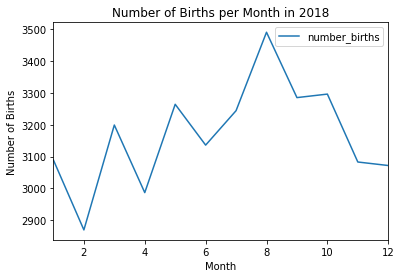

In [41]:
# This is the legacy command, but we can run it anyway so that the first plot
# shows without needing to run the cell twice.
%matplotlib inline

ax = birth_month_df.plot(kind='line', title='Number of Births per Month in 2018')
ax.set_ylabel('Number of Births')
ax.set_xlabel('Month')

We name the resulting plot object `ax` here. This is another convention when working with plots and becomes more relevant when we have multiple plots we want to display in a grid. Once we give the plot this name, we can call additional methods on it such as `set_ylabel()` and `set_xlabel()` in order to modify the format of our resulting graph.

From this plot, it looks like there's a spike in births in August (which there is for 2018, although it is slight). However, the y-axis limits are quite narrow which over-emphasizes the difference in births between months. Be careful when presenting data in this way! It can be a misleading way to present your data to people who are not familiar with data analysis techniques.

A more transparent way of showing the data in this plot would be to change the y-axis limits. Let's do that by adding an additional argument, `ylim`, to the `plot()` method.

Text(0.5, 0, 'Month')

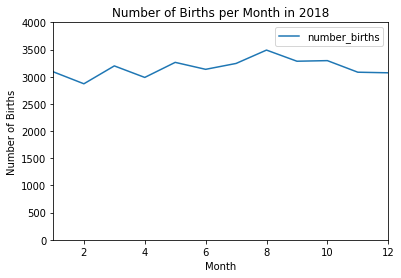

In [42]:
ax = birth_month_df.plot(kind='line', title='Number of Births per Month in 2018', ylim=(0,4000))
ax.set_ylabel('Number of Births')
ax.set_xlabel('Month')

The difference in births over the year seems less drastic now.

We can also plot this data using other types of plots, such as a bar plot, by changing the value passed to the `kind` argument.

Text(0.5, 0, 'Month')

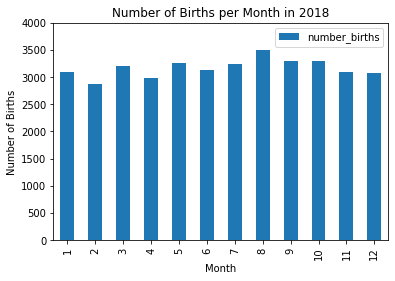

In [43]:
ax = birth_month_df.plot(kind='bar', title='Number of Births per Month in 2018', ylim=(0,4000))
ax.set_ylabel('Number of Births')
ax.set_xlabel('Month')

Let's perform the same operations for the day of the week data.

Text(0.5, 0, 'Day of Week')

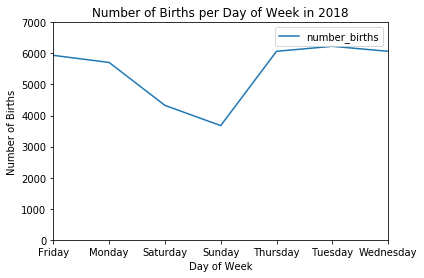

In [44]:
ax = birth_day_df.plot(kind='line', title='Number of Births per Day of Week in 2018', ylim=(0,7000))
ax.set_ylabel('Number of Births')
ax.set_xlabel('Day of Week')

Unfortunately, our x-axis labels are ordered alphabetically which is not ideal. This is because our index is not ordered appropriately. We can fix this by doing a nifty DataFrame manipulation.

We use the `loc[]` method to change the order of the index in the DataFrame. The `loc[]` method gives us a way to select rows and columns from a DataFrame using the index labels (rather than positional index). In the case below, our row index labels happen to be the different days of the week. We can pass a list of the label values in the correct order, and the `loc[]` method will change the order of the index for us before we plot the data.

**Note**: The `loc[]` method uses square brackets `[]` rather than parentheses `()` similar to when we select one or more columns in a DataFrame.

In [45]:
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
birth_day_df.loc[day_order]

,number_births
birth_day_of_wk_name,
Sunday,3676
Monday,5709
Tuesday,6229
Wednesday,6068
Thursday,6068
Friday,5938
Saturday,4327


Now let's plot the data again after rearranging the index.

Text(0.5, 0, 'Day of Week')

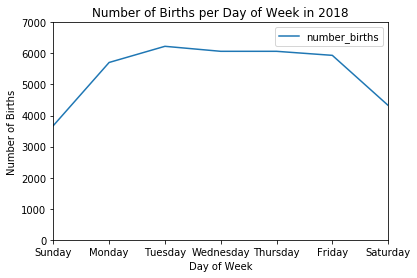

In [46]:
ax = birth_day_df.loc[day_order].plot(kind='line', title='Number of Births per Day of Week in 2018', ylim=(0,7000))
ax.set_ylabel('Number of Births')
ax.set_xlabel('Day of Week')

Text(0.5, 0, 'Day of Week')

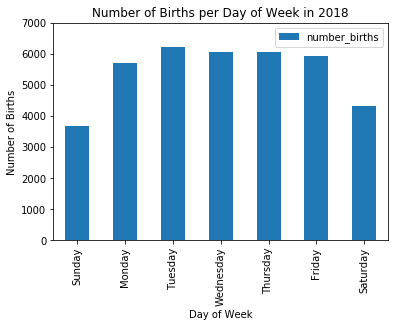

In [47]:
ax = birth_day_df.loc[day_order].plot(kind='bar', title='Number of Births per Day of Week in 2018', ylim=(0,7000))
ax.set_ylabel('Number of Births')
ax.set_xlabel('Day of Week')

We can see that there are definitely less births that occur on the weekend. This could be because hospitals are more staffed during the week so doctors try to schedule births during the week when there is more staff present for support.

### Smoking Risk: Visualization

Let's take a look at the `smoke_risks` DataFrame we created earlier.

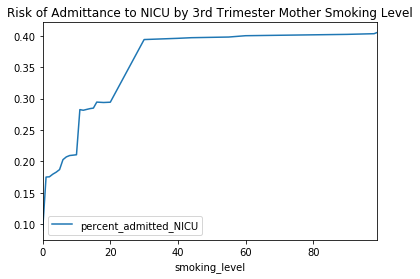

In [48]:
title = 'Risk of Admittance to NICU by 3rd Trimester Mother Smoking Level'
smoke_risks.set_index('smoking_level').plot(title=title)

From this plot, there seem to be three points where the risk jumps quite substantially. These points are:
- greater than 0
- greater than 16
- greater than 22

Let's say that a newborn is at "high risk" when the risk of the newborn being admitted to the NICU is greater than 30%. Our choice of this threshold is arbitrary. At what smoking level does the risk hit this threshold?

In [49]:
smoke_risks.percent_admitted_NICU[smoke_risks.percent_admitted_NICU>= 0.3].index[0]

18

From our analysis, 30% of the newborns born by mothers with smoking level of 18 and greater during the third trimester were admitted to the NICU. We can use this as a proxy for risk that a newborn will be admitted to the NICU for mother's with similar smoking behavior. However, we will need additional analysis (and definitely more data) to make more substantial claims or recommendations.

Referring back to our pregnant women's health campaign, we might want to inform mother's that their baby has a 30% risk of being admitted to the NICU if they smoke at level 18 or higher. To explore deeper, let's take a look at the DataFrame produced by the code below.

In [50]:
df_counts = df[df.admit_NICU != 'U'].groupby( ['cigs_tri3', 'admit_NICU']).size().reset_index()
df_counts = df_counts.pivot_table(index = 'cigs_tri3', columns = 'admit_NICU', values = 0).fillna(0).astype(int)
df_counts.columns = ['not_admitted_NICU', 'admitted_NICU'] 
df_counts['percent_admit'] = 100 * df_counts.admitted_NICU / (df_counts.admitted_NICU + df_counts.not_admitted_NICU)
df_counts 

,not_admitted_NICU,admitted_NICU,percent_admit
cigs_tri3,,,
0,32617,3036,8.515412
1,95,19,16.666667
2,120,15,11.111111
3,148,25,14.450867
4,90,11,10.891089
5,298,40,11.834320
6,62,8,11.428571
7,41,7,14.583333
8,30,7,18.918919


The above DataFrame shows the percentage of babies that were admitted to the NICU for every smoking level during the third trimester. From this we can see a few different things:

1) After smoking level 10, most smoking levels are multiples of 5.

2) After smoking level 10, the majority of cases are concentrated in smoking levels 15, 20, and 99.

3) The risk of the baby being admitted to the NICU does seem to increase as smoking level increases.

When we ran the code to calculate the risk of a newborn being admitted to the NICU for **at least** some smoking level, we are seeing some of the truth, but not all of it. Yes, there is an increase in risk as the smoking level gets higher. However, because there are so few cases between level 20 and level 99 we see a massive jump between levels 20 and 30. The cases above 20 are being dominated by the number of cases at 99 which is inflating the risk at each level above 20. Although we are able to effectively make our point that increase in smoking is correlated with an increased risk of the baby being admitted to the NICU, at a more microscopic level this type of cumulative risk can be misleading because of our imbalanced classes above the 20 level. The issue here is that our plot does not show the complete picture of the distribution for each smoking level. We need to keep this in mind when doing our analysis and presenting results.

# Thanks!

Thank you all for joining this session. We hope you found it useful and expanded your programming toolkit.

If you are interested in learning more with us, check out our offerings at the [**NYC Data Science Academy**](https://nycdatascience.com/). Applying is free! You can also email admissions@nycdatascience.com for information about any of our programs.

Feel free to explore the remainder of the data using the tools we learned in this session. Make sure to check out the data dictionary so you can understand what the values for each column represent. There are many more columns to inspect. Have fun!